In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.11 from "/usr/local/bin/python3.11"
  * The NumPy version is: "1.24.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_multiarray_umath.cpython-311-darwin.so, 0x0002): tried: '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_multiarray_umath.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_multiarray_umath.cpython-311-darwin.so' (no such file), '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_multiarray_umath.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))


In [30]:
url = "https://raw.githubusercontent.com/SushiApril/Techtern-insight/rebuild-site-with-flask/jobs.csv"
df = pd.read_csv(url)
df.head()

,name-of-company,name-of-job,location,salary,date,application-link
0,Matco,C#.NET Software Developer Intern (Summer 2024),Stow OH,$60K - $95K (Glassdoor est.),0,https://www.glassdoor.com/partner/jobListing.h...
1,"Cgi Group, Inc.",Software Developer Intern -- Entry Level,Phoenix AZ,$18.00 - $23.00 Per Hour (Employer est.),1,https://www.glassdoor.com/partner/jobListing.h...
2,Schneider Electric,Software Engineer Intern (Summer 2024),Atlanta GA,$75K - $116K (Glassdoor est.),1,https://www.glassdoor.com/partner/jobListing.h...
3,Onestaffmedical,Software Developer Backend Internship | Onsite...,Omaha NE,$17.00 - $25.00 Per Hour (Employer est.),2,https://www.glassdoor.com/partner/jobListing.h...
4,Emc Insurance,Intern-Software Engineering,Remote,NaN,2,https://www.glassdoor.com/partner/jobListing.h...


In [31]:
  # converting hourly rate to yearly
def extract_min_max(salary):

    if pd.isna(salary) or salary is None:
        return None, None
    clean_salary = salary.replace('$', '').replace(',', '').split(' (')[0].replace('\xa0', ' ')
    try:
      if 'Per Hour' in clean_salary:
          min_val, max_val = [float(val) for val in clean_salary.split(' Per Hour')[0].split(' - ')]
          # convert hourly to yearly (using 40 hours/week and 50 weeks/year)
          min_val, max_val = [val * 40 * 50 for val in (min_val, max_val)]
      elif 'K' in clean_salary:
          min_val, max_val = [float(val.split(' ')[0].replace('K', '')) * 1000 for val in clean_salary.split(' - ')]
    except:
      return None, None
    return min_val, max_val

min_lambda = lambda x: extract_min_max(x)[0] if not pd.isna(x) and extract_min_max(x)[0] is not None else None
max_lambda = lambda x: extract_min_max(x)[1] if not pd.isna(x) and extract_min_max(x)[1] is not None else None

df['min_salary'] = df['salary'].apply(min_lambda)
df['max_salary'] = df['salary'].apply(max_lambda)
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

df.head()

,name-of-company,name-of-job,location,salary,date,application-link,min_salary,max_salary,avg_salary
0,Matco,C#.NET Software Developer Intern (Summer 2024),Stow OH,$60K - $95K (Glassdoor est.),0,https://www.glassdoor.com/partner/jobListing.h...,60000.0,95000.0,77500.0
1,"Cgi Group, Inc.",Software Developer Intern -- Entry Level,Phoenix AZ,$18.00 - $23.00 Per Hour (Employer est.),1,https://www.glassdoor.com/partner/jobListing.h...,36000.0,46000.0,41000.0
2,Schneider Electric,Software Engineer Intern (Summer 2024),Atlanta GA,$75K - $116K (Glassdoor est.),1,https://www.glassdoor.com/partner/jobListing.h...,75000.0,116000.0,95500.0
3,Onestaffmedical,Software Developer Backend Internship | Onsite...,Omaha NE,$17.00 - $25.00 Per Hour (Employer est.),2,https://www.glassdoor.com/partner/jobListing.h...,34000.0,50000.0,42000.0
4,Emc Insurance,Intern-Software Engineering,Remote,NaN,2,https://www.glassdoor.com/partner/jobListing.h...,NaN,NaN,NaN


In [32]:
df.drop(columns=['salary'], inplace=True)
df.head()

,name-of-company,name-of-job,location,date,application-link,min_salary,max_salary,avg_salary
0,Matco,C#.NET Software Developer Intern (Summer 2024),Stow OH,0,https://www.glassdoor.com/partner/jobListing.h...,60000.0,95000.0,77500.0
1,"Cgi Group, Inc.",Software Developer Intern -- Entry Level,Phoenix AZ,1,https://www.glassdoor.com/partner/jobListing.h...,36000.0,46000.0,41000.0
2,Schneider Electric,Software Engineer Intern (Summer 2024),Atlanta GA,1,https://www.glassdoor.com/partner/jobListing.h...,75000.0,116000.0,95500.0
3,Onestaffmedical,Software Developer Backend Internship | Onsite...,Omaha NE,2,https://www.glassdoor.com/partner/jobListing.h...,34000.0,50000.0,42000.0
4,Emc Insurance,Intern-Software Engineering,Remote,2,https://www.glassdoor.com/partner/jobListing.h...,NaN,NaN,NaN


In [33]:
df = df.dropna(subset=['name-of-company', 'location', 'name-of-job', 'avg_salary'])

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[['name-of-company', 'location', 'name-of-job']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['name-of-company', 'location', 'name-of-job']))
# concatenate the original dataframe with the encoded dataframe
df = pd.concat([df, encoded_df], axis=1)

# drop the original categorical columns as they've been encoded
df = df.drop(columns=['name-of-company', 'location', 'name-of-job'])

#Simple Linear Regression

In [36]:
# splitting the data into training and test sets
X = df.drop(columns='avg_salary')
y = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(columns=['application-link'])
X_test = X_test.drop(columns=['application-link'])

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# creating and training the linear regression model
model = LinearRegression()

# drop rows in the training set where any of the column has NaN values
nan_rows = np.any(np.isnan(X_train_scaled), axis=1)
X_train_scaled_clean = X_train_scaled[~nan_rows]
y_train_clean = y_train[~nan_rows]

# drop rows in the test set where any of the column has NaN values
nan_rows_test = np.any(np.isnan(X_test_scaled), axis=1)
X_test_scaled_clean = X_test_scaled[~nan_rows_test]
y_test_clean = y_test[~nan_rows_test]

# fit the model using the cleaned data
model.fit(X_train_scaled_clean, y_train_clean)

LinearRegression()

In [44]:
nan_rows_test = np.any(np.isnan(X_test_scaled), axis=1)
X_test_scaled_clean = X_test_scaled[~nan_rows_test]
y_test_clean = y_test[~nan_rows_test]

# make predictions using the cleaned test data
y_pred = model.predict(X_test_scaled_clean)


RMSE: 13669.57797778379


In [60]:
from sklearn.metrics import r2_score
# calculating the RMSE (Root Mean Squared Error), R^2
rmse = mean_squared_error(y_test_clean, y_pred, squared=False)
print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R^2: {r2_score(y_test_clean, y_pred)}')

Linear Regression RMSE: 13669.57797778379
Linear Regression R^2: 0.6112652358516577


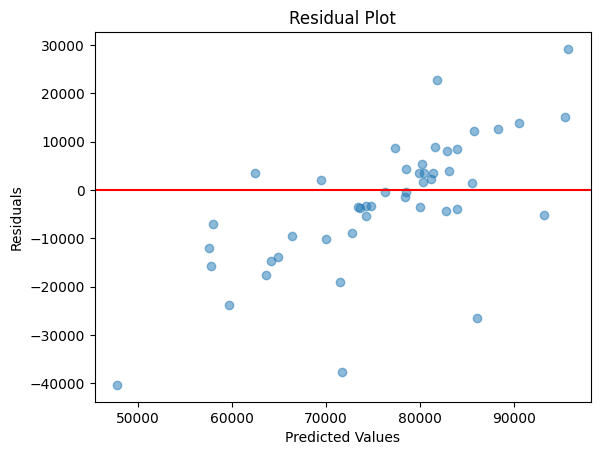

In [68]:
residuals = y_test_clean - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red')
plt.show()

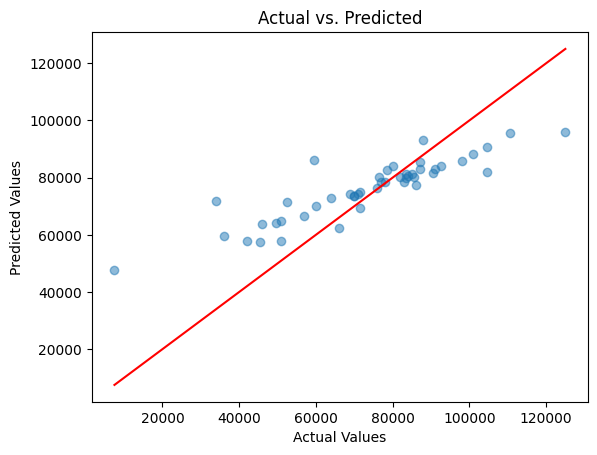

In [67]:
plt.scatter(y_test_clean, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], color='red')  # y=x line
plt.show()

#Lasso Regression

In [54]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# create a Lasso regressor object
alpha_value = 1.0  # This is a hyperparameter. You might need to tune it.
lasso = Lasso(alpha=alpha_value)

# fit the model
lasso.fit(X_train_scaled_clean, y_train_clean)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+07, tolerance: 9.950e+06
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [56]:
y_pred_lasso = lasso.predict(X_test_scaled_clean)

In [57]:
# calculate RMSE and R^2
rmse_lasso = mean_squared_error(y_test_clean, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test_clean, y_pred_lasso)

print(f"Lasso Regression RMSE: {rmse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression RMSE: 3444.7551227118634
Lasso Regression R^2: 0.9753134797798151


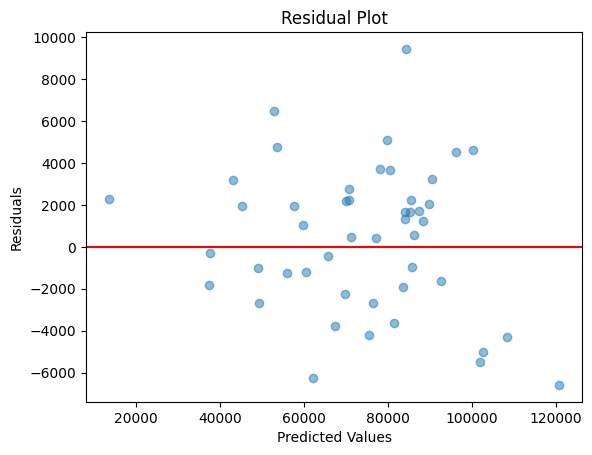

In [70]:
residuals = y_test_clean - y_pred_lasso
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red')
plt.show()

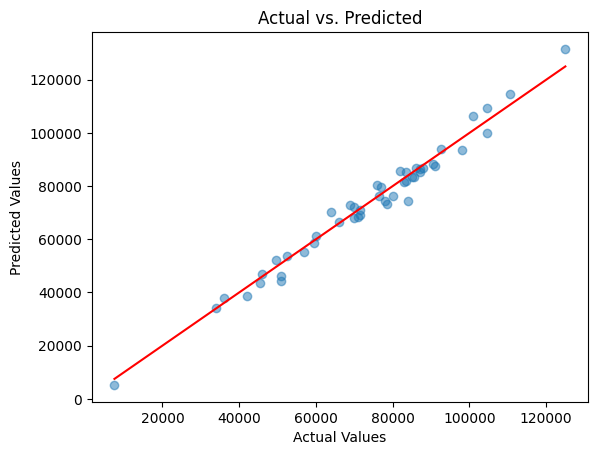

In [66]:
plt.scatter(y_test_clean, y_pred_lasso, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], color='red')  # y=x line
plt.show()

#Random Forset

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# reandom forest object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

#fit the model
rf_regressor.fit(X_train_scaled_clean, y_train_clean)

RandomForestRegressor(random_state=42)

In [50]:
y_pred_rf = rf_regressor.predict(X_test_scaled_clean)

In [59]:
# calculate RMSE and R^2 for random forest
rf_rmse = mean_squared_error(y_test_clean, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test_clean, y_pred_rf)
print(f'Random Forest R^2: {rf_r2}')
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest R^2: 0.9937338601059236
Random Forest RMSE: 1735.5153513851776


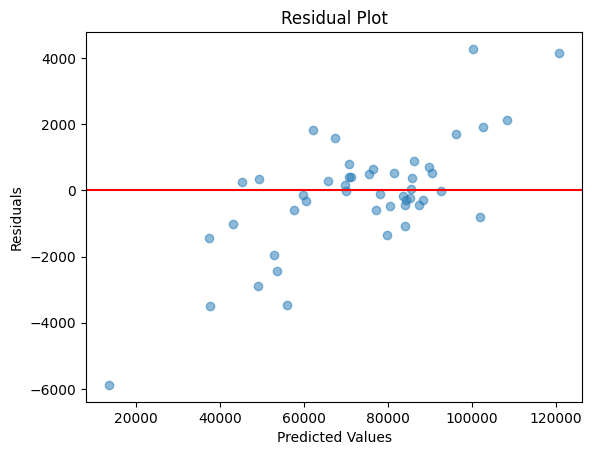

In [69]:
residuals = y_test_clean - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red')
plt.show()

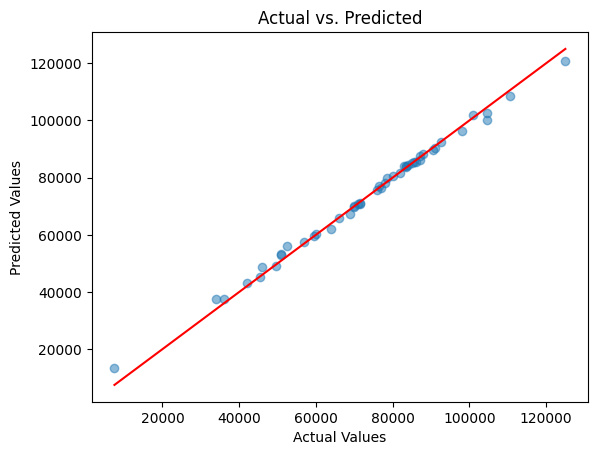

In [65]:
plt.scatter(y_test_clean, y_pred_rf, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], color='red')  # y=x line
plt.show()